# Ch.5 Regression

### 5.4 보스턴 주택 가격 예측

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from scipy import stats
from sklearn.datasets import load_boston

boston = load_boston()

In [4]:
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE'] = boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
bostonDF.shape

(506, 14)

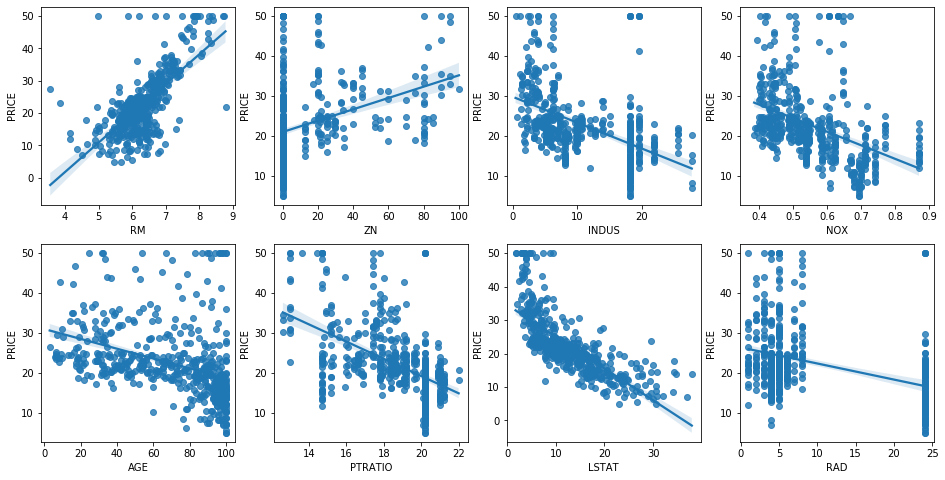

In [6]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의  regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [7]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
bostonDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 단일 변수에 대한 선형 회귀

In [9]:
X = bostonDF['RM']
y = boston.target

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=0)

- 모델 불러와 객체 생성

In [11]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

- 모델 학습하기

In [12]:
sim_lr.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- 결과 예측하기

In [13]:
pred = sim_lr.predict(X_test.values.reshape(-1,1))

- 결과 확인하기

In [14]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.42394386816456275

- 계수 w(weight), 절편 b(bias)

In [15]:
sim_lr.coef_, sim_lr.intercept_

(array([9.37638431]), -36.47618962764734)

- 도출한 회귀식 : PRICE = 9.38 * RM - 36.48

In [16]:
pred

array([22.90445223, 21.80741526, 23.2795076 , 13.67809006, 21.95743741,
       18.22563646, 18.89135974, 19.48207195, 10.15256956, 23.5795519 ,
       19.37893173, 25.94240075, 22.9794633 ,  7.1427502 , 36.67836079,
       29.54293232, 22.05120126, 31.84952286, 24.90162209, 18.37565861,
       23.77645597, 18.65695014, 20.97291706, 24.30153349, 16.80042604,
       -0.25521702, 19.4539428 , 17.05358842, 39.1818554 , 20.64474361,
       21.51674735, 20.54160338, 21.90117911, 20.67287276, 23.68269213,
       17.93496854, 19.66022326, 18.61006821, 23.04509799, 21.30109051,
       20.97291706, 17.77557001, 21.13231559, 14.40944804, 24.84536378,
       23.72957405, 17.81307555, 20.99166983,  9.49622266, 26.59874765,
       21.20732667, 16.68790943, 19.60396495, 40.96336842, 17.50365486,
       18.74133759, 17.02545926, 18.82572505, 17.50365486, 19.40706088,
       18.69445567, 20.84164768, 28.98972565, 24.95788039, 17.09109396,
       24.99538593, 25.92364798, 23.31701314, 27.77079569, 18.76

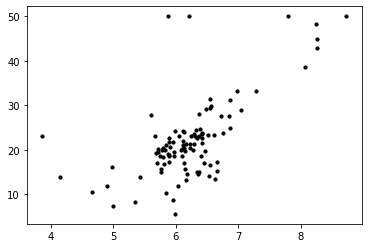

In [17]:
plt.scatter(X_test, y_test, s=10, c='black')
plt.show()

In [18]:
line_x = np.linspace(np.min(X_test), np.max(X_test),10)
line_y = sim_lr.predict(line_x.reshape(-1,1))

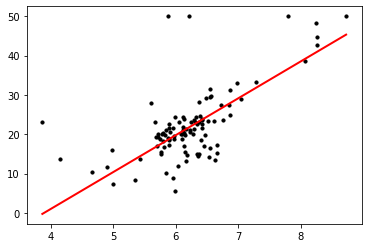

In [19]:
plt.scatter(X_test, y_test, s=10, c='black')
plt.plot(line_x,line_y, c='red', lw=2)
plt.show()

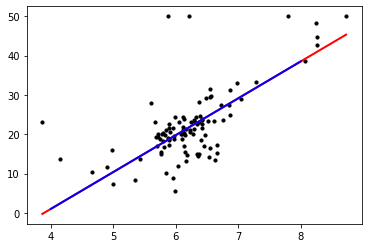

In [20]:
w = sim_lr.coef_[0]
b = sim_lr.intercept_
xs = np.array([4,8])
ys = xs * w + b

plt.scatter(X_test, y_test, s=10, c='black')
plt.plot(line_x,line_y, c='red', lw=2)
plt.plot(xs,ys, c='blue', lw=2)
plt.show()

### PRICE와 LSTAT

In [21]:
X = bostonDF['LSTAT']
y = boston.target

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=0)

In [23]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

In [24]:
sim_lr.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
pred = sim_lr.predict(X_test.values.reshape(-1,1))

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.43095672846187616

In [27]:
sim_lr.coef_, sim_lr.intercept_

(array([-0.95648761]), 34.76519272372788)

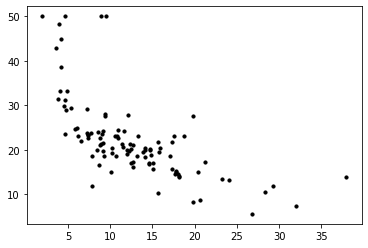

In [28]:
plt.scatter(X_test, y_test, s=10, c='black')
plt.show()

In [29]:
line_x = np.linspace(np.min(X_test), np.max(X_test),10)
line_y = sim_lr.predict(line_x.reshape(-1,1))

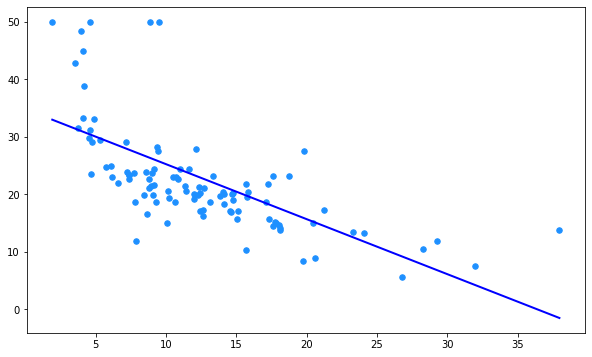

In [30]:
plt.rcParams["figure.figsize"] = (10,6)
plt.scatter(X_test, y_test, s=30, c='dodgerblue')
plt.plot(line_x,line_y, c='blue', lw=2)
plt.show()

In [31]:
X = []
line = []
line = bostonDF['LSTAT']
X.append(line)
line = []
line = bostonDF['RM']
X.append(line)
X[1]

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

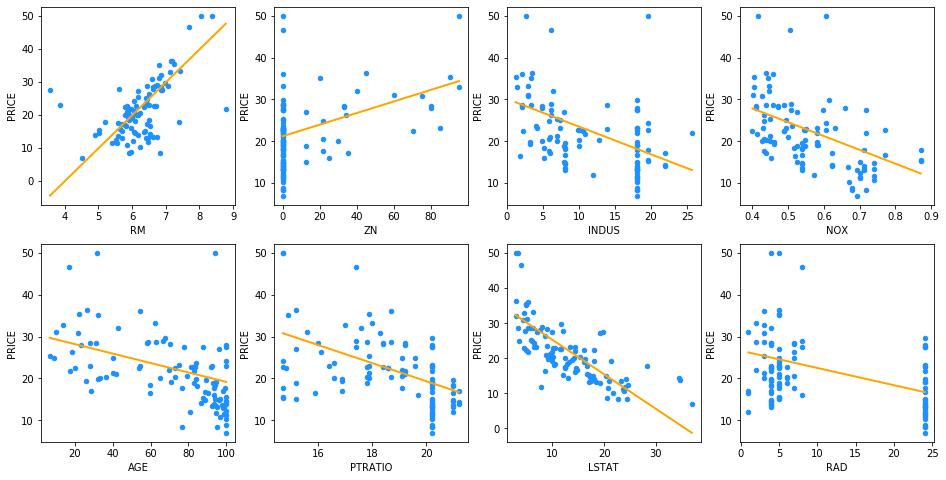

In [32]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
y = boston.target

for i, feature in enumerate(lm_features):
    X = bostonDF[feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.2, random_state=2019)

    sim_lr = LinearRegression()
    sim_lr.fit(X_train.values.reshape(-1,1),y_train)
    
    line_x = np.linspace(np.min(X_test), np.max(X_test),10)
    line_y = sim_lr.predict(line_x.reshape(-1,1))
    
    row = int(i/4)
    col = i%4
    
    axs[row][col].scatter(X_test, y_test, s=20, c='dodgerblue')
    axs[row][col].plot(line_x,line_y, c='orange', lw=2)
    axs[row][col].set_xlabel(feature)
    axs[row][col].set_ylabel('PRICE')


In [33]:
import matplotlib as mpl
# MacOS 한글 설정
from matplotlib import rc
rc('font', family='AppleGothic')
mpl.rcParams['axes.unicode_minus'] = False   # minus 표시

from sklearn.metrics import mean_squared_error
def single_regression(X_train,X_test,y_train,y_test):
    slr = LinearRegression()
    slr.fit(X_train.values.reshape(-1,1),y_train)
    y_pred = slr.predict(X_test.values.reshape(-1,1))      # RMSE는 낮을수록 좋다
    rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
    return rmse, slr.coef_[0], slr.intercept_

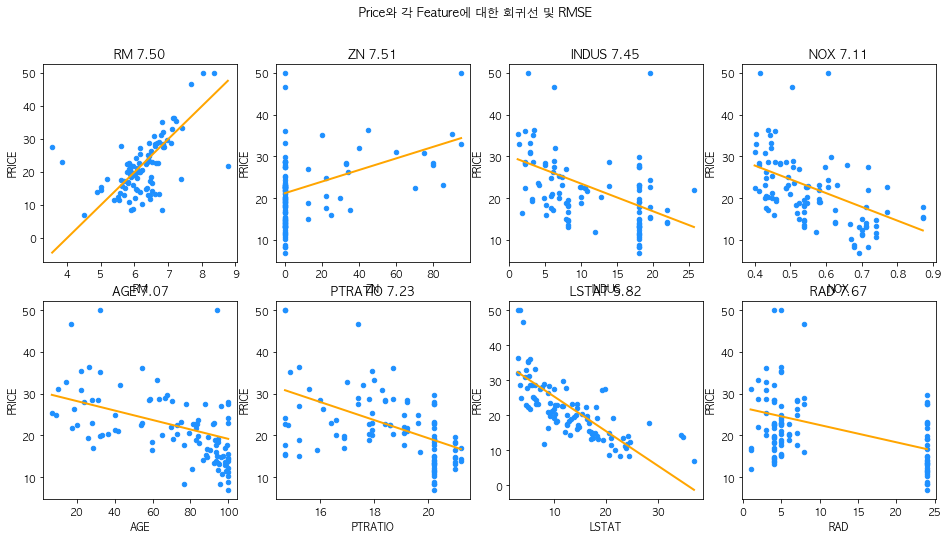

In [34]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
y = boston.target

for i, feature in enumerate(lm_features):
    X = bostonDF[feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.2, random_state=2019)

    rmse, weight, bias = single_regression(X_train, X_test, y_train, y_test)
    
    line_x = np.array([np.min(X_test), np.max(X_test)])
    line_y = weight * line_x + bias
    
    row = int(i/4)
    col = i%4
    
    axs[row][col].scatter(X_test, y_test, s=20, c='dodgerblue')
    axs[row][col].plot(line_x,line_y, c='orange', lw=2)
    axs[row][col].set_xlabel(feature)
    axs[row][col].set_ylabel('PRICE')
    axs[row][col].set_title('%s %.2f'%(feature,rmse))
    
fig.suptitle("Price와 각 Feature에 대한 회귀선 및 RMSE")
plt.show()


In [35]:
from sklearn.linear_model import LinearRegression

lrs = LinearRegression()

X = bostonDF['LSTAT']
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

lrs.fit(X_train.values.reshape(-1,1),y_train)
pred = lrs.predict(X_test.values.reshape(-1,1))
lrs_rmse = np.round(np.sqrt(mean_squared_error(y_test, pred)),2)

lrs_rmse

5.82

### Decision Tree Regressor

In [36]:
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor(max_depth=5)

X = bostonDF['LSTAT']
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

dtc.fit(X_train.values.reshape(-1,1),y_train)
pred = dtc.predict(X_test.values.reshape(-1,1))
dtc_rmse = np.round(np.sqrt(mean_squared_error(y_test, pred)),2)

dtc_rmse

5.48

### Support Vector Machine Regressor

In [37]:
from sklearn.svm import SVR

X = bostonDF['LSTAT']
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

svc = SVR()

svc.fit(X_train.values.reshape(-1,1),y_train)
pred = svc.predict(X_test.values.reshape(-1,1))
svc_rmse = np.round(np.sqrt(mean_squared_error(y_test, pred)),2)

svc_rmse

5.05

### 다중 회귀

In [39]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

In [42]:
lr = LinearRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)

In [43]:
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [44]:
print('절편 값 : ', lr.intercept_)
print('회귀 계수값 : ', np.round(lr.coef_, 1))

절편 값 :  40.995595172164336
회귀 계수값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [45]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [49]:
from sklearn.model_selection import cross_val_score

# cross_val_score()로 5폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE : 5.829


## 5.5 다항 회귀

In [55]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X = bostonDF['LSTAT']
Y = boston.target
pf = poly.fit_transform(X.values.reshape(-1,1))

In [56]:
pf.shape

(506, 3)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2019)
pf_train = poly.fit_transform(X_train.values.reshape(-1,1))
pf_test = poly.fit_transform(X_test.values.reshape(-1,1))

In [58]:
lr = LinearRegression()
lr.fit(pf_train,y_train)
pred = lr.predict(pf_test)      
rmse = np.round(np.sqrt(mean_squared_error(y_test, pred)),2)
rmse

5.34

In [59]:
lr.coef_

array([ 0.        , -2.47262189,  0.04716606])

In [60]:
lr.intercept_

44.01462657247066

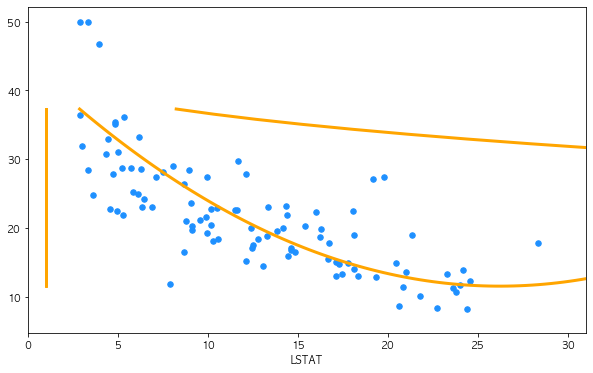

In [66]:
xs = np.linspace(np.min(X_test), np.max(X_test),100)
line_x = poly.fit_transform(xs.reshape(-1,1))
line_y = lr.predict(line_x)
plt.rcParams["figure.figsize"] = (10,6)
plt.scatter(X_test, y_test, s=30, c='dodgerblue')
plt.plot(line_x,line_y, c='orange', lw=3)
plt.xlim(0,31)
plt.xlabel('LSTAT')
plt.show()

## Ridge Regression - L2 규제

In [68]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores:  [-11.42 -24.29 -28.14 -74.6  -28.52]
5 folds 의 개별 RMSE scores:  [3.38 4.93 5.31 8.64 5.34]
5 folds 의 평균 RMSE : 5.518


In [69]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
    ridge = Ridge(alpha= alpha)
    
    #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('alpha {0} 일 때 5 folds의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds의 평균 RMSE : 5.788
alpha 1 일 때 5 folds의 평균 RMSE : 5.653
alpha 10 일 때 5 folds의 평균 RMSE : 5.518
alpha 100 일 때 5 folds의 평균 RMSE : 5.330


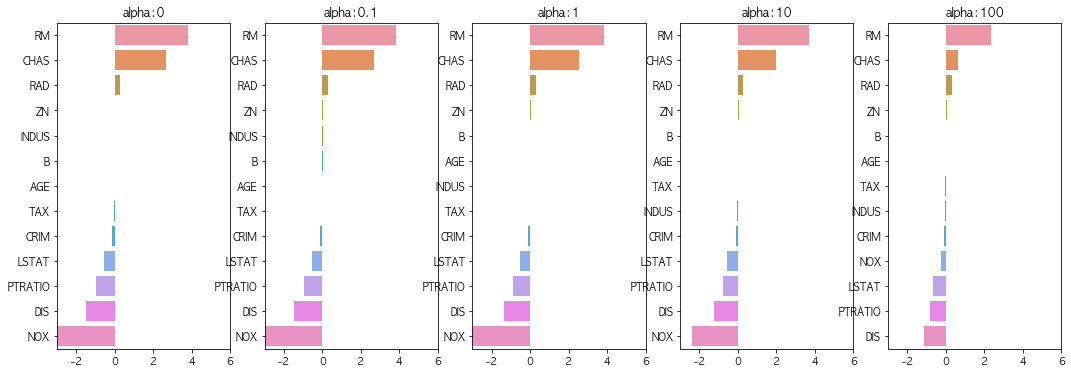

In [72]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphs 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장, pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha= alpha)
    ridge.fit(X_data, y_target)
    # alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [75]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


## 로지스틱 회귀

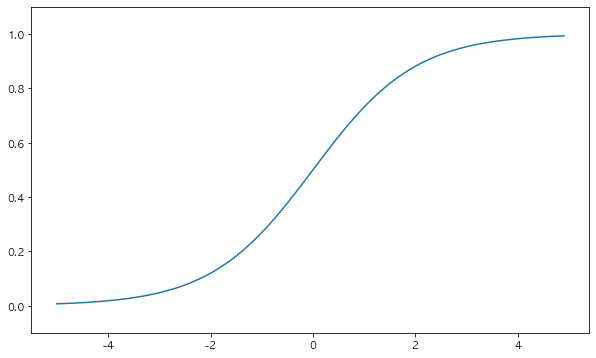

In [80]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

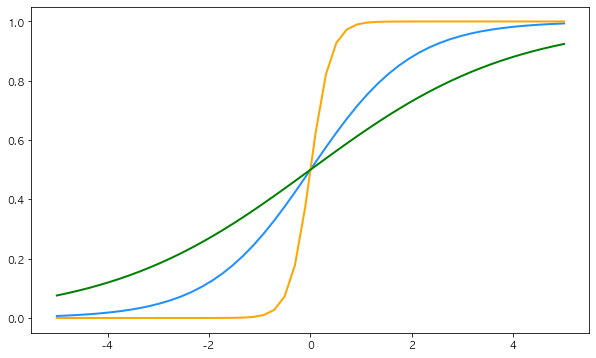

In [93]:
xs = np.linspace(-5,5)
y1 = sigmoid(xs)
y5 = sigmoid(5*xs)
y05 = sigmoid(0.5*xs)
plt.plot(xs, y1, lw=2, c='dodgerblue')
plt.plot(xs, y5, lw=2, c='orange')
plt.plot(xs, y05, lw=2, c='g')
plt.show()

## 회귀 트리